#### 1. Install TensorFlow Object Detection API
- Please make sure you have installed tensorflow or tensorflow-gpu already. 
- For latest install instructions, check the [github](https://github.com/tensorflow/models/tree/master/research/object_detection) page or [readthedocs](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/training.html) site for this API.

Clone git repo tensorflow/models - Copying the model code in the google colab machine - the GitHub Repository.


In [31]:
!git clone https://github.com/tensorflow/models


fatal: destination path 'models' already exists and is not an empty directory.


In [32]:
#Verify that models folder exist, the clone will make a models folder in our current directory
ls -l

total 12
drwx------ 4 root root 4096 Jan 22 16:13 drive/
drwxr-xr-x 7 root root 4096 Jan 22 16:12 models/
drwxr-xr-x 1 root root 4096 Jan 13 16:38 sample_data/


In [33]:
#Multiple folders including object_detection should exist in models/research folder 
!ls -l models/research/

total 280
drwxr-xr-x  2 root root 4096 Jan 22 16:12 a3c_blogpost
drwxr-xr-x  2 root root 4096 Jan 22 16:12 adversarial_crypto
drwxr-xr-x  4 root root 4096 Jan 22 16:12 adversarial_logit_pairing
drwxr-xr-x  3 root root 4096 Jan 22 16:12 adversarial_text
drwxr-xr-x  2 root root 4096 Jan 22 16:12 adv_imagenet_models
drwxr-xr-x  2 root root 4096 Jan 22 16:12 astronet
drwxr-xr-x  3 root root 4096 Jan 22 16:12 attention_ocr
drwxr-xr-x  4 root root 4096 Jan 22 16:12 audioset
drwxr-xr-x  2 root root 4096 Jan 22 16:12 autoaugment
drwxr-xr-x  3 root root 4096 Jan 22 16:12 autoencoder
drwxr-xr-x  4 root root 4096 Jan 22 16:12 brain_coder
drwxr-xr-x 11 root root 4096 Jan 22 16:12 cognitive_mapping_and_planning
drwxr-xr-x  4 root root 4096 Jan 22 16:12 cognitive_planning
drwxr-xr-x  4 root root 4096 Jan 22 16:12 compression
drwxr-xr-x  7 root root 4096 Jan 22 16:12 cvt_text
drwxr-xr-x  3 root root 4096 Jan 22 16:12 deep_contextual_bandits
drwxr-xr-x  9 root root 4096 Jan 22 16:12 deeplab
drwxr-xr-x

Install other dependencies including protobuf compiler

In [0]:
!apt-get -qq install protobuf-compiler python-pil python-lxml python-tk
!pip install --user Cython  --quiet
!pip install --user contextlib2 --quiet
!pip install --user jupyter --quiet
!pip install --user matplotlib --quiet

Protobuf compilation
- Convert .pb files to python code in object detection folder

In [35]:
#Move to models/research folder
%cd models/research

#Convert all the protobuf files to Python code using Protobuf compiler installed in previous step
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [36]:
#So here we can see each .proto file has a corresponding .py file as well
!ls -l object_detection/protos

total 728
-rw-r--r-- 1 root root   6848 Jan 22 17:49 anchor_generator_pb2.py
-rw-r--r-- 1 root root    747 Jan 22 16:12 anchor_generator.proto
-rw-r--r-- 1 root root   4359 Jan 22 17:49 argmax_matcher_pb2.py
-rw-r--r-- 1 root root   1151 Jan 22 16:12 argmax_matcher.proto
-rw-r--r-- 1 root root   2175 Jan 22 17:49 bipartite_matcher_pb2.py
-rw-r--r-- 1 root root    350 Jan 22 16:12 bipartite_matcher.proto
-rw-r--r-- 1 root root   6208 Jan 22 17:49 box_coder_pb2.py
-rw-r--r-- 1 root root    656 Jan 22 16:12 box_coder.proto
-rw-r--r-- 1 root root  35788 Jan 22 17:49 box_predictor_pb2.py
-rw-r--r-- 1 root root   7366 Jan 22 16:12 box_predictor.proto
-rw-r--r-- 1 root root  24908 Jan 22 17:49 calibration_pb2.py
-rw-r--r-- 1 root root   2876 Jan 22 16:12 calibration.proto
-rw-r--r-- 1 root root  13553 Jan 22 17:49 eval_pb2.py
-rw-r--r-- 1 root root   3923 Jan 22 16:12 eval.proto
-rw-r--r-- 1 root root   3445 Jan 22 17:49 faster_rcnn_box_coder_pb2.py
-rw-r--r-- 1 root root    531 Jan 22 16:12 

Setup environment variable - Our machine needs to know where Object Detection Model

In [37]:
#Change path to models/research and models/research/slim folders based on where you have cloned github repository above - Path is given 
%set_env PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim

env: PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim


Test Installation

In [38]:
#To be run from models/research folder
!python object_detection/builders/model_builder_test.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_wi

#### 2. Get the DataSet

Check the Directory of Capstone Prep

In [39]:
#Come to the home directory
%cd /content

from google.colab import drive
drive.mount('/content/drive')

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
cd drive/My Drive/Capstone/Caps/Food_Recognition

/content/drive/My Drive/Capstone/Caps/Food_Recognition


In [41]:
!ls -l

total 12
drwx------ 4 root root 4096 Jan 22 16:13 drive
drwxr-xr-x 7 root root 4096 Jan 22 16:12 models
drwxr-xr-x 1 root root 4096 Jan 13 16:38 sample_data
total 8
drwx------ 2 root root 4096 Jan 18 08:46 Annotations
drwx------ 2 root root 4096 Jan 18 08:46 JPEGImages


In [42]:
#Number of images
!ls -l JPEGImages | wc -l

2626


Review image annotation in XML

In [43]:
#Number of XML files - it should one for each image
!ls -l Annotations | wc -l

2626


In [44]:
#Lets check an XML file
!cat Annotations/'Chapati (38).xml'

<annotation>
	<folder>birme 400 x 500</folder>
	<filename>Chapati (38).jpg</filename>
	<path>D:\1_GreatLakes\Caps\Capstone Images\More\Chapati\birme 400 x 500\Chapati (38).jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>400</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>Chapati</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1</xmin>
			<ymin>107</ymin>
			<xmax>400</xmax>
			<ymax>420</ymax>
		</bndbox>
	</object>
</annotation>


#### 3. Data Pre-processing : Convert XML to CSV

Use xml_to_csv.py file provided. This script will read all XML files and save the information in a CSV file.
 Here we are copying the script file from Google Drive.

In [45]:
pwd

'/content/drive/My Drive/Capstone/Caps/Food_Recognition'

In [46]:
cd ..

/content/drive/My Drive/Capstone/Caps


In [47]:
#We should have 'xml_to_csv.py' script in our current folder
!ls -l

total 209
drwx------ 4 root root   4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root 197202 Jan 22 16:30 Food_Recognition.csv
-rw------- 1 root root   4440 Nov  3 10:56 generate_tfrecord.py
drwx------ 7 root root   4096 Jan 22 17:48 models
-rw------- 1 root root   2583 Nov  2 02:50 xml_to_csv.py


Generate CSV file from all XML files using copied script. The script requires two parameters
1. -i <xml_files_folder_name> : indicating XML files are stored
2. -o <output_file_path> : indicating what name should be given to CSV output file and where it should be stored.

In [48]:
#Running the script with options
!python xml_to_csv.py -i Food_Recognition/Annotations -o Food_Recognition.csv

Successfully converted xml to csv.


In [49]:
#We should have Food_Recognition.csv file (Details of all images, just created via xml_to_csv.py script above) in current folder
!ls -l

total 209
drwx------ 4 root root   4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root 197202 Jan 22 17:49 Food_Recognition.csv
-rw------- 1 root root   4440 Nov  3 10:56 generate_tfrecord.py
drwx------ 7 root root   4096 Jan 22 17:48 models
-rw------- 1 root root   2583 Nov  2 02:50 xml_to_csv.py


Load csv file as dataframe
The csv created has details of each object (and not image) and it's location x1,y1 and x2,y2

In [50]:
import pandas as pd
df1 = pd.read_csv('Food_Recognition.csv')
df1.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,nd (162).jpg,400,500,Noodles,79,25,400,495
1,nd (166).jpg,400,500,Noodles,28,53,400,498
2,nd (164).jpg,400,500,Noodles,3,14,400,494
3,nd (165).jpg,400,500,Noodles,7,239,400,489
4,nd (163).jpg,400,500,Noodles,1,6,400,496


In [51]:
#How many object across all images - So currently we have 4186 Objects
df1.shape

(4001, 8)

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [53]:
#List of labels
df1['class'].unique()

array(['Noodles', 'omelette', 'Boilled Egg', 'Parathe', 'Pickel',
       'Butter', 'Green_Chutney', 'Curd', 'Salad', 'Aalo Sabzi',
       'Capsicum_Curry', 'Red_Chutney', 'Green_Salad', 'veg_biryani',
       'idly', 'Butter Paneer', 'Baingan Bhartha', 'Kadhai Veg', 'Breads',
       'Egg', 'Biryani', 'Chapati', 'Curry', 'Dal', 'Chutney', 'Pickle',
       'Matar_Paneer', 'Palak_Paneer', 'White_Rice', 'Boiled_Eggs',
       'Peas', 'Moong_Dal_Salad', 'Kheer', 'Papad', 'Methi_Curry ',
       'Rajma_Masala', 'Butter_Milk', 'Mutton_Curry', 'Aalo_Bhindi_Sabzi',
       'Bhindi_Sabzi', 'Hot_beverages', 'Boiled_Egg', 'Aalo_Sabzi',
       'Kachauri', 'Podi Powder', 'Sambhar', 'Garlic Bread', 'Fries',
       'Meet Balls', 'egg', 'Rice', 'Roti', 'Raita', 'Rice with Panner',
       'Butter Panner', 'Paneer', 'Gulab Jamun', 'Oranges', 'Masala Dosa',
       'Poori', 'Bread', 'Rasgulla', 'Aloo Gobi', 'Mixed Veg', 'Veg Roll',
       'Cool Drink', 'Wine', 'Pickel '], dtype=object)

In [0]:
## Segregating the classes
df1["class"]= df1["class"].replace("Boiled_Eggs", "egg") 
df1["class"]= df1["class"].replace("Boilled Egg", "egg")
df1["class"]= df1["class"].replace("Boiled_Egg", "egg")
df1["class"]= df1["class"].replace("Roti", "Chapati")
df1["class"]= df1["class"].replace("Biryani", "veg_biryani")
df1["class"]= df1["class"].replace("Butter Panner", "Butter Paneer") 
df1["class"]= df1["class"].replace("Matar_Paneer", "Butter Paneer")
df1["class"]= df1["class"].replace("Salad", "Green_Salad")

In [55]:
df1.head(2)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,nd (162).jpg,400,500,Noodles,79,25,400,495
1,nd (166).jpg,400,500,Noodles,28,53,400,498


In [0]:
condition = (df1['class'] == "egg") | (df1['class'] =="Hot_beverages") | (df1['class'] =="Chapati") | (df1['class'] =="Green_Salad") | (df1['class'] =="Noodles") | (df1['class'] =="veg_biryani")|(df1['class'] =="Butter Paneer")|(df1['class'] =="idly")|(df1['class'] =="Parathe")

In [57]:
df1 =  df1[condition]
df1.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,nd (162).jpg,400,500,Noodles,79,25,400,495
1,nd (166).jpg,400,500,Noodles,28,53,400,498
2,nd (164).jpg,400,500,Noodles,3,14,400,494
3,nd (165).jpg,400,500,Noodles,7,239,400,489
4,nd (163).jpg,400,500,Noodles,1,6,400,496


In [58]:
 df1.shape

(3706, 8)

In [59]:
#List of labels
df1['class'].unique()

array(['Noodles', 'egg', 'Parathe', 'Green_Salad', 'veg_biryani', 'idly',
       'Butter Paneer', 'Chapati', 'Hot_beverages'], dtype=object)

In [60]:
#Number of labels/classes, So here we have labelled 71 Objects
len(df1['class'].unique())

9

In [61]:
df1['class'].value_counts()

egg              835
Hot_beverages    435
Parathe          391
Chapati          387
Green_Salad      384
Noodles          326
idly             323
veg_biryani      321
Butter Paneer    304
Name: class, dtype: int64

We will need to Label encode classes e.g assign a unique index number for each class

In [0]:
#Use Label encoder available in Scikit Learn
from sklearn import preprocessing

In [63]:
#Label Encode class and add a 'label' column to the dataframe
le = preprocessing.LabelEncoder()
df1['label'] = le.fit_transform(df1['class'])
df1.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,label
0,nd (162).jpg,400,500,Noodles,79,25,400,495,4
1,nd (166).jpg,400,500,Noodles,28,53,400,498,4
2,nd (164).jpg,400,500,Noodles,3,14,400,494,4
3,nd (165).jpg,400,500,Noodles,7,239,400,489,4
4,nd (163).jpg,400,500,Noodles,1,6,400,496,4


In [64]:
#unique values in the label
df1.label.unique()

array([4, 6, 5, 2, 8, 7, 0, 1, 3])

In [65]:
#Object detection API expects index to start from 1 (and not 0)
df1['label'] = df1['label'] + 1
df1.label.unique()

array([5, 7, 6, 3, 9, 8, 1, 2, 4])

In [66]:
#Dataframe should have label column now
df1.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,label
0,nd (162).jpg,400,500,Noodles,79,25,400,495,5
1,nd (166).jpg,400,500,Noodles,28,53,400,498,5
2,nd (164).jpg,400,500,Noodles,3,14,400,494,5
3,nd (165).jpg,400,500,Noodles,7,239,400,489,5
4,nd (163).jpg,400,500,Noodles,1,6,400,496,5


In [67]:
#Create a dictionary of Label and Class. This will be useful for building our second input to Model training
label_class_dict = dict(zip(df1['label'], df1['class']))
label_class_dict

{1: 'Butter Paneer',
 2: 'Chapati',
 3: 'Green_Salad',
 4: 'Hot_beverages',
 5: 'Noodles',
 6: 'Parathe',
 7: 'egg',
 8: 'idly',
 9: 'veg_biryani'}

In [0]:
df1.to_csv('Food_Recognition_Refined.csv') 

In [69]:
#So our Final Dataset with Boundary Box Details of only the Objects we are present with is saved in the file as "Food_Recognition_Refined.xlsx"
ls-l

total 413
drwx------ 4 root root   4096 Jan 17 11:02 Food_Recognition/
-rw------- 1 root root 197202 Jan 22 17:49 Food_Recognition.csv
-rw------- 1 root root 208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root   4440 Nov  3 10:56 generate_tfrecord.py
drwx------ 7 root root   4096 Jan 22 17:48 models/
-rw------- 1 root root   2583 Nov  2 02:50 xml_to_csv.py


**Split data between training and test**

First we have to split images between training and test. Then we can use that information to split dataframe between training and test. This will make sure objects from same image are not split between training and test.

In [70]:
#Get information on all images - All the image names under one array 
all_classes = df1['filename'].unique()
all_classes.shape

(2612,)

In [0]:
#Split images between training and test
import numpy as np

#80% of the data will be used for training
mask = np.random.rand(all_classes.shape[0]) < 0.8

#Get Training and Test images
train_images = all_classes[mask]
test_images = all_classes[~mask] 

In [72]:
#Check number of images in training and test
train_images.shape, test_images.shape

((2101,), (511,))

In [0]:
#Split dataframe between training and test
train_df = df1[df1['filename'].isin(train_images)]
test_df = df1[df1['filename'].isin(test_images)]

In [74]:
train_df.shape, test_df.shape

((3004, 9), (702, 9))

**Visualizing the data**

In [0]:
#We will use opencv and matplotlib
from matplotlib import pyplot as plt
import cv2

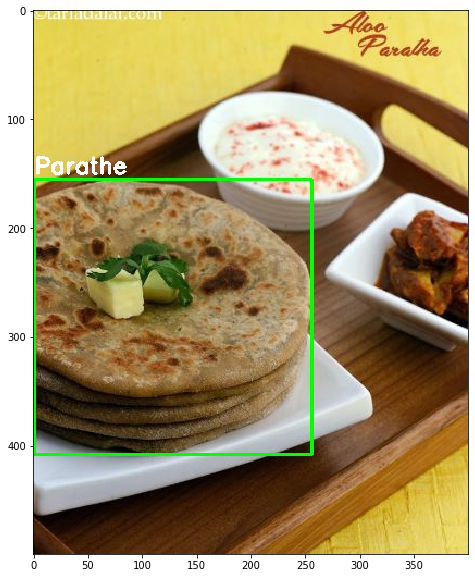

In [76]:
#Pickup a random image number
img_num = np.random.randint(0, df1.shape[0])

#Read the image
img_file = df1.loc[img_num,'filename']
img = cv2.imread('Food_Recognition/JPEGImages/' + img_file)

#Find all rows which have same file name
rows_with_file = df1[df1['filename'] == img_file].index.tolist()

#Draw rectangle(s) as per bounding box information
for i in rows_with_file:

    #Get bounding box
    xmin, ymin, xmax, ymax = df1.loc[i, ['xmin', 'ymin', 'xmax', 'ymax']]
    #Get Label
    label = df1.loc[i, 'class']
    #Add bounding box
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
    #Add text
    cv2.putText(img,label,(xmin, ymin-5),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

Save training and test data as csv

In [0]:
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [78]:
#We should have train.csv and test.csv files in current directory
!ls -l

total 600
drwx------ 4 root root   4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root 197202 Jan 22 17:49 Food_Recognition.csv
-rw------- 1 root root 208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root   4440 Nov  3 10:56 generate_tfrecord.py
drwx------ 7 root root   4096 Jan 22 17:48 models
-rw------- 1 root root  36121 Jan 22 17:49 test.csv
-rw------- 1 root root 154962 Jan 22 17:49 train.csv
-rw------- 1 root root   2583 Nov  2 02:50 xml_to_csv.py


#### 4. Generate tfrecord from CSV
Tensorflow object detection API requires data in tfrecord format. This can be done using generate_tfrecord.py file.

In [79]:
#Make sure the script file is available in working folder
!ls -l

total 600
drwx------ 4 root root   4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root 197202 Jan 22 17:49 Food_Recognition.csv
-rw------- 1 root root 208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root   4440 Nov  3 10:56 generate_tfrecord.py
drwx------ 7 root root   4096 Jan 22 17:48 models
-rw------- 1 root root  36121 Jan 22 17:49 test.csv
-rw------- 1 root root 154962 Jan 22 17:49 train.csv
-rw------- 1 root root   2583 Nov  2 02:50 xml_to_csv.py


In [0]:
#Make sure models/research folder is on system path
#Please change folder name is you are using a different folder structure
import sys
sys.path.append('/content/models/research')

In [81]:
df1.head(2)

,filename,width,height,class,xmin,ymin,xmax,ymax,label
0,nd (162).jpg,400,500,Noodles,79,25,400,495,5
1,nd (166).jpg,400,500,Noodles,28,53,400,498,5


The script file requires 3 inputs

1. --csv_input=<csv_file_path> : where is csv file located which was prepared in previous step
2. --img_path=<images_folder> : where are the actual images stored
3. --output_path=<output_file_path> : where the script can save the generated tfrecord file and what should be file name.

We will run script for training and test csv separately to create two tfrecord files.

In [82]:
#generate tfrecord for training data
!python generate_tfrecord.py --csv_input=train.csv  --img_path=Food_Recognition/JPEGImages --output_path=train.record

Successfully created the TFRecords: /content/drive/My Drive/Capstone/Caps/train.record


In [83]:
#generate tfrecord for test data
!python generate_tfrecord.py --csv_input=test.csv  --img_path=Food_Recognition/JPEGImages --output_path=test.record

Successfully created the TFRecords: /content/drive/My Drive/Capstone/Caps/test.record


In [84]:
#train.record and test.record files should be available now
!ls -l

total 93297
drwx------ 4 root root     4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root   208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root     4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root    36121 Jan 22 17:49 test.csv
-rw------- 1 root root 18371897 Jan 22 18:05 test.record
-rw------- 1 root root   154962 Jan 22 17:49 train.csv
-rw------- 1 root root 76751819 Jan 22 18:02 train.record
-rw------- 1 root root     2583 Nov  2 02:50 xml_to_csv.py


#### 5. Create Label File

In [85]:
#Dict which was created earlier will be used for building Label Mapping file
label_class_dict

{1: 'Butter Paneer',
 2: 'Chapati',
 3: 'Green_Salad',
 4: 'Hot_beverages',
 5: 'Noodles',
 6: 'Parathe',
 7: 'egg',
 8: 'idly',
 9: 'veg_biryani'}

In [0]:
#Build a pbtxt label file using label and class name
#This is required by Object detection API
#You can prepare it manually as well. 
#A sample pbtxt file can be found at object_detection/data/pascal_label_map.pbtxt
pbtxt_file_txt = ''
for label in sorted(label_class_dict.keys()):
    
    pbtxt_file_txt += "item {\n  id: " + str(label) + "\n  name: '" +  label_class_dict[label] + "'\n}\n\n"

with open('Food_Recognition_Label_File.pbtxt','w') as pbfile:
    pbfile.write(pbtxt_file_txt)

In [87]:
!ls -l

total 93298
drwx------ 4 root root     4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root      337 Jan 22 18:05 Food_Recognition_Label_File.pbtxt
-rw------- 1 root root   208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root     4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root    36121 Jan 22 17:49 test.csv
-rw------- 1 root root 18371897 Jan 22 18:05 test.record
-rw------- 1 root root   154962 Jan 22 17:49 train.csv
-rw------- 1 root root 76751819 Jan 22 18:02 train.record
-rw------- 1 root root     2583 Nov  2 02:50 xml_to_csv.py


In [88]:
#Review the file content
!cat Food_Recognition_Label_File.pbtxt

item {
  id: 1
  name: 'Butter Paneer'
}

item {
  id: 2
  name: 'Chapati'
}

item {
  id: 3
  name: 'Green_Salad'
}

item {
  id: 4
  name: 'Hot_beverages'
}

item {
  id: 5
  name: 'Noodles'
}

item {
  id: 6
  name: 'Parathe'
}

item {
  id: 7
  name: 'egg'
}

item {
  id: 8
  name: 'idly'
}

item {
  id: 9
  name: 'veg_biryani'
}



#### 6. Download a pre-trained model

A list of pre-trained models is available at [TensorFlow model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md#coco-trained-models-coco-models). We will use 'rfcn_resnet101_coco' model for transfer learning.

In [0]:
#Download the model from zoo
!wget -q http://download.tensorflow.org/models/object_detection/rfcn_resnet101_coco_2018_01_28.tar.gz

In [90]:
ls -l

total 730949
drwx------ 4 root root      4096 Jan 17 11:02 Food_Recognition/
-rw------- 1 root root       337 Jan 22 18:05 Food_Recognition_Label_File.pbtxt
-rw------- 1 root root    208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root      4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root 652955004 Feb 10  2018 rfcn_resnet101_coco_2018_01_28.tar.gz
-rw------- 1 root root     36121 Jan 22 17:49 test.csv
-rw------- 1 root root  18371897 Jan 22 18:05 test.record
-rw------- 1 root root    154962 Jan 22 17:49 train.csv
-rw------- 1 root root  76751819 Jan 22 18:02 train.record
-rw------- 1 root root      2583 Nov  2 02:50 xml_to_csv.py


In [91]:
#Extract tar file content
!tar -xvf rfcn_resnet101_coco_2018_01_28.tar.gz

rfcn_resnet101_coco_2018_01_28/
rfcn_resnet101_coco_2018_01_28/model.ckpt.index
rfcn_resnet101_coco_2018_01_28/checkpoint
rfcn_resnet101_coco_2018_01_28/pipeline.config
rfcn_resnet101_coco_2018_01_28/model.ckpt.data-00000-of-00001
rfcn_resnet101_coco_2018_01_28/model.ckpt.meta
rfcn_resnet101_coco_2018_01_28/saved_model/
rfcn_resnet101_coco_2018_01_28/saved_model/saved_model.pb
rfcn_resnet101_coco_2018_01_28/saved_model/variables/
rfcn_resnet101_coco_2018_01_28/frozen_inference_graph.pb


In [92]:
!ls -l rfcn_resnet101_coco_2018_01_28
#model.ckpt.data-00000-of-00001 --> This model is the model prepared and given for Transfer Learning.

total 487254
-rw------- 1 root root        77 Feb  1  2018 checkpoint
-rw------- 1 root root 217873144 Feb  1  2018 frozen_inference_graph.pb
-rw------- 1 root root 274429844 Feb  1  2018 model.ckpt.data-00000-of-00001
-rw------- 1 root root     25851 Feb  1  2018 model.ckpt.index
-rw------- 1 root root   6610155 Feb  1  2018 model.ckpt.meta
-rw------- 1 root root      3173 Feb  1  2018 pipeline.config
drwx------ 3 root root      4096 Feb  1  2018 saved_model


#### 7. Prepare Training configuration file

You can copy a sample configuration for the chosen pre-trained model (ssd_mobilenet_v1_coco) in this case from 'object_detection/samples/configs' folder. Here are things which need to be changed at a minimum.

1. Change num_classes parameter to 32 (as we have 32 categories in our dataset)
2. For 'train_input_reader' change 'input_path' to filepath of train.record file.
3. For 'train_input_reader' change 'label_map_path' to filepath of Food_Recognition_Label_File.pbtxt file.
4. Repeat above two steps for 'eval_input_reader'.
5. Change fine_tune_checkpoint to filepath where pre-trained model.ckpt file is available e.g ssd_mobilenet_v1_coco_2018_01_28/model.ckpt
6. Change 'batch_size' accordingly to available memory.
7. Change 'num_steps' to indicate how long the training will done e.g. 200000. For demo purpose, we are keeping it to 20 so that we can finish training quickly.


In [113]:
ls -l

total 730972
-rw------- 1 root root      7234 Jan 22 18:06 export_inference_graph.py
drwx------ 4 root root      4096 Jan 17 11:02 Food_Recognition/
-rw------- 1 root root       337 Jan 22 18:05 Food_Recognition_Label_File.pbtxt
-rw------- 1 root root    208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root      4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root      4541 Jan 22 18:06 model_main.py
drwx------ 3 root root      4096 Jan 22 18:05 rfcn_resnet101_coco_2018_01_28/
-rw------- 1 root root 652955004 Feb 10  2018 rfcn_resnet101_coco_2018_01_28.tar.gz
-rw------- 1 root root      3068 Jan 22 17:50 rfcn_resnet101_coco.config
-rw------- 1 root root     36121 Jan 22 17:49 test.csv
-rw------- 1 root root  18371897 Jan 22 18:05 test.record
-rw------- 1 root root    154962 Jan 22 17:49 train.csv
drwx------ 2 root root      4096 Jan 22 18:06 training/
-rw------- 1 root root  76751819 Jan 22 18:02 train.record
-rw------- 1 root root      2583 Nov  2 02:50 xml_

In [114]:
!cat  rfcn_resnet101_coco.config

model {
  faster_rcnn {
    num_classes: 9
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: "faster_rcnn_resnet50"
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        height_stride: 16
        width_stride: 16
        scales: 0.25
        scales: 0.5
        scales: 1.0
        scales: 2.0
        aspect_ratios: 0.5
        aspect_ratios: 1.0
        aspect_ratios: 2.0
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        truncated_normal_initializer {
          stddev: 0.00999999977648
        }
      }
    }
    first_stage_nms_score_threshold: 0.0
    first_stage_nms_iou_threshold: 0.699999988079
    first_stage_max_proposals: 100
    first_stage_localization_loss_weight: 2.0


#### 8. Training the model

In [0]:
#Copy train.py file from 'models/research/object_detection/legacy' folder to current folder -- Copying the executable model file in our current directory
!cp /content/models/research/object_detection/model_main.py .

In [116]:
!ls -l
#model_main.py . file exists

total 730972
-rw------- 1 root root      7234 Jan 22 18:06 export_inference_graph.py
drwx------ 4 root root      4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root       337 Jan 22 18:05 Food_Recognition_Label_File.pbtxt
-rw------- 1 root root    208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root      4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root      4541 Jan 22 18:12 model_main.py
drwx------ 3 root root      4096 Jan 22 18:05 rfcn_resnet101_coco_2018_01_28
-rw------- 1 root root 652955004 Feb 10  2018 rfcn_resnet101_coco_2018_01_28.tar.gz
-rw------- 1 root root      3068 Jan 22 17:50 rfcn_resnet101_coco.config
-rw------- 1 root root     36121 Jan 22 17:49 test.csv
-rw------- 1 root root  18371897 Jan 22 18:05 test.record
-rw------- 1 root root    154962 Jan 22 17:49 train.csv
drwx------ 2 root root      4096 Jan 22 18:06 training
-rw------- 1 root root  76751819 Jan 22 18:02 train.record
-rw------- 1 root root      2583 Nov  2 02:50 xml_to_

Start training 

- Please note that Object detection take long time to train. The training may take few days if run on single GPU machine (depending on num of steps indicated). Try to keep training the model till loss comes close to 1 (or goes below 1). The script takes 3 inputs

1. --train=<folder_name> : where model will be saved periodically as training progresses
2. --pipeline_config_path=<config_file_path> :where is model training configuration file located.
3. --logtostderr : Where error and warning messages will be sent. Not providing any value means that it will show messages on the screen.

In [117]:
#Create a training folder to store model checkpoints/snapshots as training progresses
!mkdir training

mkdir: cannot create directory ‘training’: File exists


In [98]:
!ls -l

total 730962
drwx------ 4 root root      4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root       337 Jan 22 18:05 Food_Recognition_Label_File.pbtxt
-rw------- 1 root root    208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root      4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root      4541 Jan 22 18:06 model_main.py
drwx------ 3 root root      4096 Feb  1  2018 rfcn_resnet101_coco_2018_01_28
-rw------- 1 root root 652955004 Feb 10  2018 rfcn_resnet101_coco_2018_01_28.tar.gz
-rw------- 1 root root     36121 Jan 22 17:49 test.csv
-rw------- 1 root root  18371897 Jan 22 18:05 test.record
-rw------- 1 root root    154962 Jan 22 17:49 train.csv
drwx------ 2 root root      4096 Jan 22 18:06 training
-rw------- 1 root root  76751819 Jan 22 18:02 train.record
-rw------- 1 root root      2583 Nov  2 02:50 xml_to_csv.py


In [118]:
###### start training
!python model_main.py --pipeline_config_path=rfcn_resnet101_coco.config --model_dir=training/ --alsologtostderr

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0122 18:12:33.561265 140199856437120 module_wrapper.py:139] From /content/models/research/object_detection/utils/config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0122 18:12:33.565611 140199856437120 module_wrapper.py:139] From /content/models/research/object_detection/model_lib.py:628: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0122 18:12:33.565897 140199856437120 model_lib.py:629] Forced number of epochs for all eval validations to be 1.

W0122 18:12:33.566091 140199856437120 module_wrapper.py:139] From /content/models/resea

In [100]:
#Check the training folder --Saving is also done here
!ls -l training

#All the model.ckpt files are saved.
# Here only two models are saved at iteration # 0 and 200 - First and Last iteration models are saved
# Saving happens at every 500 iterations
#It keeps the last 5 of these models only, so as not to increase a lot size. 

total 0


#### 9. Export trained model

From the saved model checkpoints, we will create a frozen trained model. Frozen here means to remove model nodes which are no longer needed in prediction. This reduces model size.

In [0]:
#Copy export_inference_graph.py file from models/research/object_detection to current directory
!cp /content/models/research/object_detection/export_inference_graph.py .

In [102]:
# "export_inference_graph.py" file should be present in pwd
!ls -l

total 730969
-rw------- 1 root root      7234 Jan 22 18:06 export_inference_graph.py
drwx------ 4 root root      4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root       337 Jan 22 18:05 Food_Recognition_Label_File.pbtxt
-rw------- 1 root root    208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root      4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root      4541 Jan 22 18:06 model_main.py
drwx------ 3 root root      4096 Feb  1  2018 rfcn_resnet101_coco_2018_01_28
-rw------- 1 root root 652955004 Feb 10  2018 rfcn_resnet101_coco_2018_01_28.tar.gz
-rw------- 1 root root     36121 Jan 22 17:49 test.csv
-rw------- 1 root root  18371897 Jan 22 18:05 test.record
-rw------- 1 root root    154962 Jan 22 17:49 train.csv
drwx------ 2 root root      4096 Jan 22 18:06 training
-rw------- 1 root root  76751819 Jan 22 18:02 train.record
-rw------- 1 root root      2583 Nov  2 02:50 xml_to_csv.py


The export_inference_graph.py script file requires the following input:

1. --input_type <input_node_name> : This will be used during prediction to set model input
2. --pipeline_config_path <model_training_config_file_path> : where is model training config file located.
3. --trained_checkpoint_prefix <file_path__model_checkpoint> : Which checkpoint should be used to create final model.
4. --output_directory <frozen_model_directory> : where should the frozen model created by script should be stored.

In [103]:
#Provide input name, config file location, training folder
!python export_inference_graph.py --input_type image_tensor --pipeline_config_path faster_rcnn_resnet101_coco.config --trained_checkpoint_prefix training/model.ckpt-100 --output_directory Food_Recognition_faster_rcnn_resnet101_model

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0122 18:06:23.659649 139663781123968 module_wrapper.py:139] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Traceback (most recent call last):
  File "export_inference_graph.py", line 162, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 299, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.6/dist-packages/absl/app.py", line 25

In [104]:
#Check if model is saved in current direcoty
!ls -l Food_Recognition_faster_rcnn_resnet101_model

ls: cannot access 'Food_Recognition_faster_rcnn_resnet101_model': No such file or directory


In [105]:
!ls -l

total 730969
-rw------- 1 root root      7234 Jan 22 18:06 export_inference_graph.py
drwx------ 4 root root      4096 Jan 17 11:02 Food_Recognition
-rw------- 1 root root       337 Jan 22 18:05 Food_Recognition_Label_File.pbtxt
-rw------- 1 root root    208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root      4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root      4541 Jan 22 18:06 model_main.py
drwx------ 3 root root      4096 Jan 22 18:05 rfcn_resnet101_coco_2018_01_28
-rw------- 1 root root 652955004 Feb 10  2018 rfcn_resnet101_coco_2018_01_28.tar.gz
-rw------- 1 root root     36121 Jan 22 17:49 test.csv
-rw------- 1 root root  18371897 Jan 22 18:05 test.record
-rw------- 1 root root    154962 Jan 22 17:49 train.csv
drwx------ 2 root root      4096 Jan 22 18:06 training
-rw------- 1 root root  76751819 Jan 22 18:02 train.record
-rw------- 1 root root      2583 Nov  2 02:50 xml_to_csv.py


So here our model of 94 mb has been reduced to 23 mb.    
frozen_inference_graph.pb model is the frozen moel, which can be used for prediction.


We can use '**frozen_inference_graph.pb**' model for model prediction.
frozen_inference_graph

In [0]:
import tensorflow as tf
import os
import urllib, tarfile

In [107]:
ls -l

total 730969
-rw------- 1 root root      7234 Jan 22 18:06 export_inference_graph.py
drwx------ 4 root root      4096 Jan 17 11:02 Food_Recognition/
-rw------- 1 root root       337 Jan 22 18:05 Food_Recognition_Label_File.pbtxt
-rw------- 1 root root    208506 Jan 22 17:49 Food_Recognition_Refined.csv
-rw------- 1 root root      4440 Nov  3 10:56 generate_tfrecord.py
-rw------- 1 root root      4541 Jan 22 18:06 model_main.py
drwx------ 3 root root      4096 Jan 22 18:05 rfcn_resnet101_coco_2018_01_28/
-rw------- 1 root root 652955004 Feb 10  2018 rfcn_resnet101_coco_2018_01_28.tar.gz
-rw------- 1 root root     36121 Jan 22 17:49 test.csv
-rw------- 1 root root  18371897 Jan 22 18:05 test.record
-rw------- 1 root root    154962 Jan 22 17:49 train.csv
drwx------ 2 root root      4096 Jan 22 18:06 training/
-rw------- 1 root root  76751819 Jan 22 18:02 train.record
-rw------- 1 root root      2583 Nov  2 02:50 xml_to_csv.py


Load Model

In [108]:
#Come to the home directory
%cd /content

from google.colab import drive
drive.mount('/content/drive')

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
cd /content/drive/My Drive/Capstone/Caps

/content/drive/My Drive/Capstone/Caps


In [110]:
pwd

'/content/drive/My Drive/Capstone/Caps'

In [0]:
#Set the variable to file path where your .pb is stored
PATH_TO_FROZEN_GRAPH = 'faster_rcnn_resnet101_coco_2018_01_28/frozen_inference_graph.pb'

In [112]:
#Load pb file
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

NotFoundError: ignored

#### Load Labels

In [0]:
#Make sure models/research folder is on system path
#Please change folder name is you are using a diffrent folder structure
import sys
sys.path.append('/content/models/research')

In [0]:
#Change path to models/research and models/research/slim folders based on where you have cloned github repository above - Path is given 
%set_env PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim

In [0]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [0]:
#Change the filepath for .pbtxt mapping file depending on where you have stored your .pbtxt file
category_index = label_map_util.create_category_index_from_labelmap('./Food_Recognition_Label_File.pbtxt', use_display_name=True)
print(category_index)

Load Test Dataframe

In [0]:
ls -l 

Model Prediction

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Function to do model prediction

In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[1], image.shape[2])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: image})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.int64)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

In [0]:
def visualize_output(image_path):

  image = tf.keras.preprocessing.image.load_img(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = tf.keras.preprocessing.image.img_to_array(image).astype(np.uint8)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np_expanded, detection_graph)
  print(output_dict['detection_classes'])
  # Visualization of the results of a detection.
  im_width, im_height = image.size
  final_box = []
  #start: return a list containing bbox coordinate and class name
  # This is the way I'm getting my coordinates
  boxes = output_dict['detection_boxes']
  # get all boxes from an array
  max_boxes_to_draw = boxes.shape[0]
  # get scores to get a threshold
  scores = output_dict['detection_scores']
  # this is set as a default but feel free to adjust it to your needs
  min_score_thresh=.5
  # iterate over all objects found
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
        # boxes[i] is the box which will be drawn
        #class_name = category_index[output_dict['detection_classes'][i]]['name']
        class_name = category_index[1]['name']
        ymin, xmin, ymax, xmax = boxes[i]
        final_box.append([xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height, class_name])
  print(final_box)      
  #end 

  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=(12,8))
  plt.imshow(image_np)
  plt.axis('on')
  plt.show()
  return final_box  

In [0]:
output = visualize_output('Food_Recognition/JPEGImages/Boiled_Egg (78).jpg')

In [0]:
print(outputdict_detecton_boxes)